In [ ]:
#Importation des pacquets nécessaires à l'estimation. 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

In [ ]:
#Importation et aperçu des données:
df = pd.read_excel('caschool (2).xlsx')

In [ ]:
#Création des termes d'interaction:
df['str_calw'] = df['str']*df['calw_pct']
df['str_meal'] = df['str']*df['meal_pct']
df['str_comp'] = df['str']*df['comp_stu']
df['str_expn'] = df['str']*df['expn_stu']
df['str_avginc'] = df['str']*df['avginc']
df['str_el'] = df['str']*df['el_pct']
df['str2'] = df['str']*df['str']
df['str3'] = df['str2']*df['str']
df['el_pct2'] = df['el_pct']*df['el_pct']
df['el_pct3'] = df['el_pct2']*df['el_pct']

In [ ]:
#Création de la variable objectif et des variables explicatives

X = df.drop(['testscr', 'Observation Number', 'dist_cod', 'county', 'district', 'gr_span', 'read_scr', 'math_scr'], axis=1)
y = df['testscr']

In [ ]:
#Séparation des données en échantillon d'entrainement et échantillon test.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [ ]:
#Estimation d'un modèle linéaire sur l'échantillon d'entrainement:
model1 = LinearRegression().fit(X_train, y_train)

In [ ]:
#Test de la qualité de l'ajustement du modèle sur l'échantillon test:
pred_1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, pred_1)
print(mse1)

75.38088931153966


In [ ]:
#Régression Ridge avec sélection de lambda par validation croisée:
model2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10]).fit(scale(X_train), y_train)
pred_2 = model2.predict(scale(X_test))
mse2 = mean_squared_error(y_test, pred_2)
print(mse2)

72.12137981864625


In [ ]:
#Régression Lasso avec sélection de lambda par variation croisée:
model3 = LassoCV(cv=336).fit(scale(X_train), y_train)
pred_3 = model3.predict(scale(X_test))
mse3 = mean_squared_error(y_test, pred_3)
print(mse3)

70.14499030707505


In [ ]:
print(model3.n_features_in_)
print(model3.alpha_)
#Le nombre de paramètres non-nuls est donc 20, et la valeur de lambda choisie par validation croisée est aproximativement 0.03


20
0.27010881259884734


In [ ]:
#Modèle PCA
pca = PCA()
X_pca = pca.fit_transform(scale(X_train))
X_pca.shape
n = len(X_pca)
LOOCV = model_selection.LeaveOneOut()
regr = LinearRegression()
mse_pca = []


## MSE
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_pca[:,:i], y_train, cv=LOOCV, scoring='neg_mean_squared_error').mean()
    mse_pca.append(score)

    

In [ ]:
mse_pca.index(min(mse_pca))
#LOOCV choisit donc 7 composantes. 

7

In [ ]:
pca = PCA(n_components=7)
X_pca_train = pca.fit_transform(scale(X_train))
X_pca_test = pca.fit_transform(scale(X_test))
model5 = LinearRegression().fit(X_pca_train, y_train)
pred_5 = model5.predict(X_pca_test)
mse_5 = mean_squared_error(y_test, pred_5)
print(mse_5)
#L'EQMP du modèle avec analyse par composantes principales est donc environ 200.

205.73469305294188


In [ ]:
#Modèle PLS
n = len(X_train)
LOOCV = model_selection.LeaveOneOut()
mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=LOOCV, scoring='neg_mean_squared_error').mean()
    mse.append(-score)


In [ ]:
mse.index(min(mse))
#PLS choisit donc 17 composantes. 
model6 = PLSRegression(n_components=17).fit(X_train, y_train)
pred_6 = model6.predict(X_test)
mse_6 = mean_squared_error(y_test, pred_6)
print(mse_6)
#L'EQMP du modèle PLS est donc d'environ 70.

70.58793132480287


In [ ]:
#Tous les modèles semblent produire un ajustement d'une qualité similaire, 
#mis à part le modèle par composantes principales. Celui ci semble produire une EQMP fortement 
#supérieure aux autres modèles, d'environ 200, tandis que les autres modèles produisent une EQMP d'environ 70. 
#En général, il semblerait qu'on peut peut bien prédire les résultats académiques des enfants avec les variables
#disponibles, puisque la moyenne de la variable 'testscr' est de 654, 
#et que l'EQMP des meilleurs modèles est d'environ 70.

654.156548055013

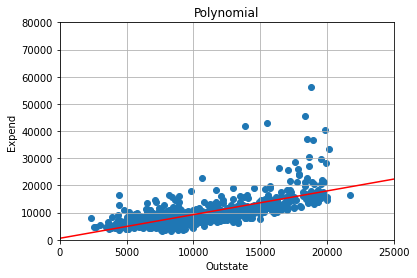

14905826.526625805


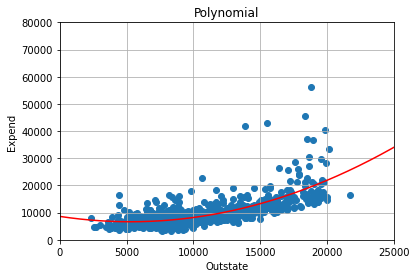

13174718.57527732


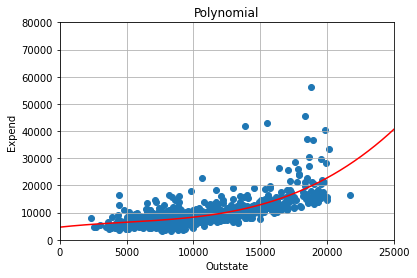

13092589.452177463


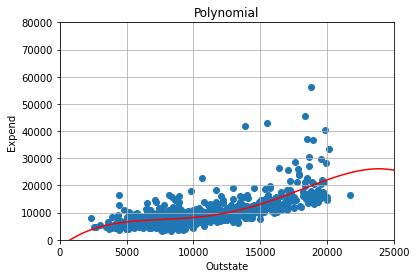

13020874.962731149


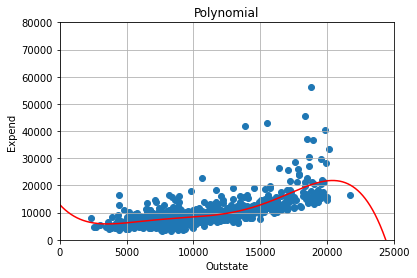

12926575.837654583


In [ ]:
#Problème 2:
df = pd.read_csv('College.csv')
X = df['Outstate']
y = df['Expend']
for i in np.arange(1, 6):
  degree = i
  poly_fit = np.poly1d(np.polyfit(X,y, degree))
  xx = np.linspace(0, 100000, 100000)
  plt.plot(xx, poly_fit(xx), c='r',linestyle='-')
  plt.title('Polynomial')
  plt.xlabel('Outstate')
  plt.ylabel('Expend')
  plt.axis([0, 25000, 0, 80000])
  plt.grid(True)
  plt.scatter(X, y)
  plt.show()
  y_pred = poly_fit(X)
  mse = mean_squared_error(y, y_pred)
  print(mse)


Text(0, 0.5, 'Expend')

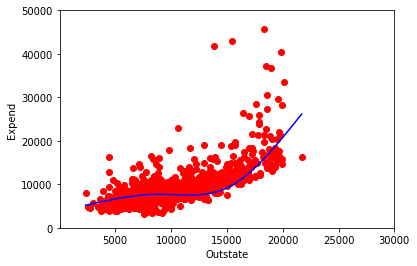

In [ ]:
import patsy as ps
from patsy import dmatrix
grid = np.arange(df['Outstate'].min(), df['Outstate'].max()).reshape(-1,1)
transformed = dmatrix("cr(df.Outstate, df=4)", {"df.Outstate": df.Outstate}, return_type='dataframe')
fit3 = sm.GLM(df.Expend, transformed).fit()
pred = fit3.predict(dmatrix("cr(grid, df=4)", {"grid": grid}, return_type='dataframe'))
plt.scatter(df.Outstate, df.Expend, color='r')
plt.plot(grid, pred, color='b')
[plt.vlines(i , 0, 350, linestyles='dashed', lw=2, colors='b') for i in [25,40,60]]
plt.xlim(15,30000)
plt.ylim(0,50000)
plt.xlabel('Outstate')
plt.ylabel('Expend')
#Nous avons sélectionné le nombre de noeuds, 4, à priori, tel que vu en classe. 
#Alternativement, le nombre de noeuds aurait pu été sélectionné par validation croisée.
